<center>

#**Resolucion de la Ecuacion de Calor con "Physic Involved Neural Networks"**

**Autor Guillermo Manuel Kulemeyer**

Proyecto Computacional Integrador

Física Computacional 2023

</center>




---



**RESUMEN**

*
En este trabajo se resuelve utilizando distintos métodos a La ecuacion de calor con condiciones indiciales fijas obteniendo una funcion $T(x,t)$. Se compara una solucion analitica, una solucion obtenida utilizando el metodo de *Diferencias Finitas* y una solucion utilizando "*Physic Involved Neural Networks*".

El objetivo es realizar un ajuste de una funcion $PINN(x,t) \approx T(x,t)$, siendo $T$ la funcion solucion a la ecuacion de Calor y  $PINN$ una red entrenada utilizando la libreria Torch.*



---



# **INTRODUCCIÓN**

 La ecuación de calor es una de las ecuaciones fundamentales en la física y la ingeniería que describe cómo se propaga y se distribuye la temperatura en un sistema. Su comprensión y resolución son fundamentales para una amplia gama de aplicaciones en campos como la termodinámica, la transferencia de calor, la difusión y la física de materiales.

En este trabajo, se aborda la resolución de la ecuación de calor con condiciones iniciales y frontera fijas, lo que implica encontrar una función $T(x,t)$ que represente la distribución de temperatura en el sistema. A través del uso de diferentes métodos, como una solución analítica, el método de Diferencias Finitas y las $PINN$, se busca mejorar y ampliar nuestras capacidades para resolver este problema.

**¿Qué son las PINNs?**

Las PINNs (Redes Neuronales Involucradas en la Física, por sus siglas en inglés) son un tipo de red neuronal que se puede utilizar para resolver ecuaciones diferenciales parciales. Esto se logra incorporando las ecuaciones gobernantes de la EDP en la función de pérdida de la red neuronal, lo que permite que la red neuronal aprenda la solución de la EDP a partir de una pequeña cantidad de datos, o incluso sin datos.

Las PINNs tienen varias ventajas sobre los métodos tradicionales para resolver EDPs con características particulares:
- Difíciles o imposibles de resolver mediante métodos tradicionales.
- Condiciones de frontera complejas.
- Espacios de entrada de alta dimensión.

A la vez, las PINNs también tienen algunas desventajas que deben ser tenidas en cuetna:
- Pueden requerir un tiempo de entrenamiento computacionalmente costoso.
- Pueden ser sensibles a la elección de los hiperparámetros.
- Pierden interpretabilidad.

El impacto de este trabajo radica en una contribución al estado del arte en la resolución numérica de la ecuación de calor, al comparar y evaluar la precisión y eficiencia de diferentes métodos. Esto permitirá identificar las fortalezas y limitaciones de cada enfoque y proporcionará pautas para la elección del método más adecuado en diferentes situaciones. Además, la utilización de redes $PINN$ representa una innovación en el campo de la resolución de ecuaciones diferenciales. Estas redes combinan la capacidad de aprendizaje de las redes neuronales con las leyes físicas subyacentes, lo que puede abrir nuevas posibilidades en la modelización y predicción de fenómenos térmicos.

En resumen, este trabajo busca avanzar en el estudio y la resolución de la ecuación de calor, explorando nuevas aproximaciones y comparando métodos tradicionales con enfoques novedosos basados en redes neuronales con conocimiento físico.

# **ASPECTOS TEÓRICOS Y ALGORÍTMICOS**

# 🔥 Resolucion de la Ecuacion de calor
Supongamos que tenemos una barra metalica de longitud $L = 1$ que se encuentra aislada en los laterales. Inicialmente la barra se encuentra a $100C$ y se situan los extremos de la barra en un baño termico a $10C$. \\
  Si planteamos el sistema modelando solo la transmision de calor a lo largo de la barra (unidimensional), y considerando la constante de difusion $\alpha = 0.005$.
\begin{equation}
\frac{\partial T(x,t)}{\partial t} = \alpha \frac{\partial^2 T(x,t)}{\partial x^2} \qquad x \in [0,1] \ ; \ t \in [0,3600]
\end{equation}
Con \begin{equation}
T(0,t) = T(1,t) = 10; \qquad  T(x,0) = 100  
\end{equation}

## Resolucion analitica
La solucion analitica a este sistema es la serie:
\begin{equation}
T(x,t) = \frac{400}{\pi} \sum_{n=1}^{\infty} \frac{\sin [(2n-1)x]}{(2n-1)}  e^{- \alpha^2(2n-1)^2 t}
\end{equation}

De la cual truncamos los primeros 100 terminos para obtener una buena solucion aproximada.

## Diferencias finitas
Tambien se puede realizar una aproximacion numerica, discretizando una grilla con puntos en x y t, y luego aproximando las derivadas y la funcion a partir de las condiciones de contorno.
El espacio se divide en 100 puntos, de forma que $L/N_X=\Delta x = 0.01$ y se analizan T_tot = 3600 segundos con un paso de tiempo $\Delta t = 0.05$, por lo que $N_t=72000$ y $p = 0.25$.
 teniendo en cuenta que el  $ p = \frac{ \alpha * \Delta t}{(\Delta x)^2} < \frac{1}{2} $ nos aseguramos la convergencia del metodo.
\begin{equation}
T[x, t] =\sum_{i}^{N_x} \sum_{j}^{N_t} T[x_i, t_{j-1}] + p * (T[x_{i+1}, t_{j-1}] + T[x_{i-1}, t_{j-1}] - 2 * T[x_i, t_{j-1}])
\end{equation}




---



# **RESULTADOS OBTENIDOS**



## Importado de librerias

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Video
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker

from sklearn.model_selection import train_test_split
import scipy.io
import torch
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.
import torch.nn as nn                     # neural networks
import torch.nn.functional as F
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph

!pip3 install pyDOE
from pyDOE import lhs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=13da1c8d313ab7d1298584d308f90b5f0cf02c3c15f54adf947593574c7fc3ec
  Stored in directory: /root/.cache/pip/wheels/3c/ca/0d/63b767ad585fbcb3ea222541572dcb78859d0383510672b105
Successfully built pyDOE


Definicion de funciones utiles para utilizar

In [ ]:
def plot3D(x,t,y):
  x_plot =x
  t_plot =t
  X,TIME= np.meshgrid(x_plot,t_plot)
  F_xt = y
  # Create the mesh
  X,TIME= np.meshgrid(t, x)
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(X,TIME, F_xt,20,cmap="rainbow")
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('T(x,t)')
  ax.set_xlabel('t')
  ax.set_ylabel('x')
  plt.show()
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, TIME, F_xt,cmap="rainbow")
  ax.set_xlabel('t')
  ax.set_ylabel('x')
  ax.set_zlabel('T(x,t)')
  plt.show()

def plot3D_torch(x,t,y):
  x_plot =x.squeeze(1)
  t_plot =t.squeeze(1)
  X,T= torch.meshgrid(x_plot,t_plot)
  F_xt = y
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(T,X, F_xt,20,cmap="rainbow")
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('F(x,t)')
  ax.set_xlabel('t')
  ax.set_ylabel('x')
  plt.show()

## Resolucion analitica
La solucion analitica a este sistema es la serie:
\begin{equation}
T(x,t) = \frac{400}{\pi} \sum_{n=1}^{\infty} \frac{\sin [(2n-1)x]}{(2n-1)}  e^{- \alpha^2(2n-1)^2 t}
\end{equation}

De la cual truncamos los primeros 100 terminos para obtener una buena solucion aproximada.

In [ ]:
#GRILLA DE PUNTOS

x_min,x_max,total_points_x = 0, 1, 100
t_min,t_max,total_points_t = 0, 3600, 3600
x=np.linspace(x_min,x_max,total_points_x).reshape(-1, 1)
t=np.linspace(t_min,t_max,total_points_t).reshape(-1, 1)
# Create the mesh
X,TIME= np.meshgrid(t, x)

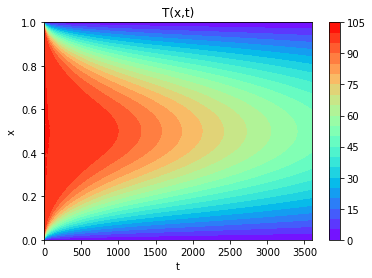

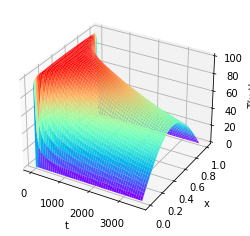

In [ ]:
def RealT(x,t):

  alpha = 0.005
  F = 0.0
  N = 100 + 1
  for n in range(1,N):
    k =(2 * n) - 1
    arg = - (alpha **2 ) * (k ** 2) * (np.pi **2) * t
    F = F + (400 /(k * np.pi)) * np.sin(k * np.pi * x) * np.exp(arg)
  return F

T_real = RealT(TIME, X)


plot3D(x, t, T_real)

## Diferencias finitas
Tambien se puede realizar una aproximacion numerica, discretizando una grilla con puntos en x y t, y luego aproximando las derivadas y la funcion a partir de las condiciones de contorno.
El espacio se divide en 100 puntos, de forma que $L/N_X=\Delta x = 0.01$ y se analizan T_tot = 3600 segundos con un paso de tiempo $\Delta t = 0.05$, por lo que $N_t=72000$ y $p = 0.25$.
 teniendo en cuenta que el  $ p = \frac{ \alpha * \Delta t}{(\Delta x)^2} < \frac{1}{2} $ nos aseguramos la convergencia del metodo.
\begin{equation}
T[x, t] =\sum_{i}^{N_x} \sum_{j}^{N_t} T[x_i, t_{j-1}] + p * (T[x_{i+1}, t_{j-1}] + T[x_{i-1}, t_{j-1}] - 2 * T[x_i, t_{j-1}])
\end{equation}

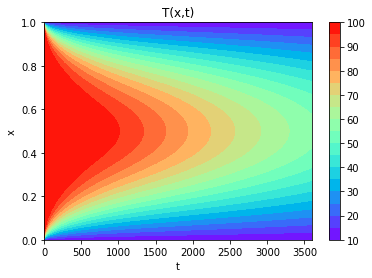

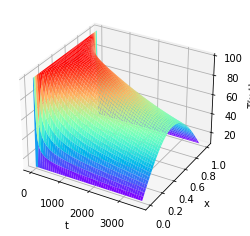

In [ ]:
def heat_equation(x_0 = 10., x_f = 10., T_0 = 100., alpha=0.005):
  """
    Resuelve la ecuacion de calor por el metodo de diferencias finitas.

    Args:
    x_0: float, Temperatura del contorno izquierdo
    x_f: float, Temperatura del contorno derecho
    T_0: float, Perfil de temperatura de la barra
    alpha: float, Difusividad termica del material

    Returns:
    T: 2D array, La evolucion temporal del perfil de temperatura
  """



  # Condiciones de Integracion

  L = 1.
  alpha = 0.005
  n_t = int(3600)
  n_L = int(100)
  Deltat = 0.005
  Deltax = L / n_L
  T = np.empty([n_L, n_t])  # F(x,t)
  p = alpha * Deltat / (Deltax**2)


  # Condiciones iniciales
  T[:, 0] = T_0
  T[0, :] = x_0
  T[-1, :] = x_f
  # Integracion numerica por diferencias finitas
  for t in range(1, n_t):
      for x in range(1, n_L - 1):
          T[x, t] = T[x, t - 1] + p * (T[x + 1, t - 1] + T[x - 1, t - 1] - 2 * T[x, t - 1])

  return T
##########################################################################################
T = heat_equation()

plot3D(x, t, T)

# Implementacion de Redes Neuronales 🧠
Es necesario definir:
- una funcion de error para minimizar

\begin{equation}
Loss_{PDE} = \frac{\partial}{\partial t} PINN(x,t) - \alpha \frac{\partial^2}{\partial x^2} PINN(x,t) \qquad \rightarrow \  0
\end{equation}

\\
\begin{equation}
Loss_{BC} =  \left[(PINN(0,t) - x_0) + (PINN(1,t) - x_L) + (PINN(x,0) - T_0)\right] \qquad \rightarrow \ 0
\end{equation}

\begin{equation}
Loss = Loss_{PDE} + \chi Loss_{BC} \qquad \rightarrow \ 0
\end{equation}

Inicialmente definimos una semilla y utilizamos una gpu cuda proporcionada por google para realizar calculo, en vez de un cpu, ya que estas estan optimizadas para este tipo de calculos.

In [ ]:
#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(123)

# Random number generators in other libraries
np.random.seed(1234)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

if device == 'cuda':
    print(torch.cuda.get_device_name())

cuda


**Diseño de la Red**

In [ ]:
class PINN(nn.Module):
  def __init__(self):
    super(PINN, self).__init__()
    # Arquitectura
    self.features = nn.Sequential(nn.Linear(2,  32), nn.Sigmoid(),
                                  nn.Linear(32, 32), nn.Sigmoid(),
                                  nn.Linear(32, 32), nn.Sigmoid(),
                                  nn.Linear(32, 32), nn.Sigmoid(),
                                  nn.Linear(32, 1))
    self.loss_function = nn.MSELoss(reduction ='mean')
    self.iter = 0 #For the Optimizer

  # Forward pass
  def forward(self, x):
    if torch.is_tensor(x) != True:
      x = torch.from_numpy(x)
    x = self.features(x)
    return x


  ####### Funcion de coste ######

  #Loss PDE
  def loss_PDE(self,x_PDE):
    g=x_PDE.clone()
    g.requires_grad=True #Enable differentiation
    f=self.forward(g)
    f_x_t = autograd.grad(f,g,torch.ones([g.shape[0], 1]).to(device), retain_graph=True, create_graph=True)[0] # Primera derivada ([:,[0]]-> x, [:,[1]]-> t)
    f_xx_tt = autograd.grad(f_x_t,g,torch.ones(g.shape).to(device), create_graph=True)[0] # Segunda derivada ([:,[0]]-> x, [:,[1]]-> t)
    f_t=f_x_t[:,[1]]
    f_xx=f_xx_tt[:,[0]]
    f=f_t-f_xx
    return self.loss_function(f,f_hat)

  def loss_BC(self, X_BC, Y_BC):
    return self.loss_function(self.forward(X_BC.view(-1,2)),Y_BC.view(-1,1))

  def loss(self, X_BC, Y_BC, PDE):
    loss_bc = self.loss_BC(X_BC, Y_BC)
    loss_pde = self.loss_PDE(PDE)
    return loss_pde + loss_bc

  # Optimizador
  def closure(self):
    optimizer.zero_grad()
    loss = self.loss(X_train_Nu,Y_train_Nu,X_train_Nf)
    loss.backward()
    self.iter += 1
    if self.iter % 100 == 0:
      loss2=self.lossBC(X_test,T_test)
      print("Training Error:",loss.detach().cpu().numpy(),"---Testing Error:",loss2.detach().cpu().numpy())
    return loss

Generacion del Dataset en torch y se evalua que este correcto en la funcion analitica.

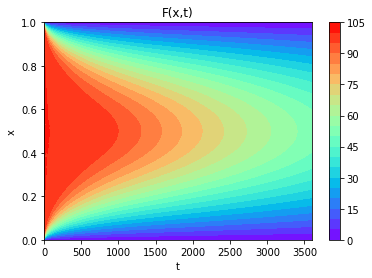

In [ ]:
x_torch = torch.linspace(x_min,x_max,total_points_x).view(-1,1)
t_torch = torch.linspace(t_min,t_max,total_points_t).view(-1,1)
# Create the mesh
X_torch, TIME_torch =torch.meshgrid(x_torch.squeeze(1),t_torch.squeeze(1))
# Evaluate real function
T_real_torch = torch.from_numpy(T_real)
plot3D_torch(x_torch,t_torch,T_real_torch) #f_real was defined previously(function)

Ahora se debe transformar la grilla en un vector de 2 columnas, para que esta sea la entrada de mi red neuronal

In [ ]:
# Transform the mesh into a 2-column vector
x_test=torch.hstack((X_torch.flatten()[:,None],TIME_torch.flatten()[:,None]))
Y_test=T_real_torch.flatten()[:,None] # Colum major Flatten (so we transpose it)
# Domain bounds #
x_0=x_test[0] # first value
x_1=x_test[-1] #last value
print(x_test.shape,Y_test.shape)

torch.Size([360000, 2]) torch.Size([360000, 1])


Agregamos ahora las condiciones iniciales y lo apilamos en un unico dataset

In [ ]:
#Initial Condition
#Borde izquierdo: x(x,0)=100->xmin=<x=<xmax; t=0
X_izq=torch.hstack((X_torch[:,0][:,None],TIME_torch[:,0][:,None])) # First column # The [:,None] is to give it the right dimension
Y_izq=(torch.ones(Y_test.shape[0])*100).unsqueeze(1)

#Boundary Conditions
#Bottom Edge: x=min; tmin=<t=<max
bottom_X=torch.hstack((X_torch[0,:][:,None],TIME_torch[0,:][:,None])) # First row # The [:,None] is to give it the right dimension
bottom_Y=torch.ones(bottom_X.shape[0],1)*10
#Top Edge: x=max; 0=<t=<1
top_X=torch.hstack((X_torch[-1,:][:,None],TIME_torch[-1,:][:,None])) # Last row # The [:,None] is to give it the right dimension
top_Y=torch.ones(top_X.shape[0],1)*10
#Get all the training data into the same dataset
X_train=torch.vstack([X_izq,bottom_X,top_X])
Y_train=torch.vstack([Y_izq,bottom_Y,top_Y])
print(X_train.shape,Y_train.shape)

torch.Size([7300, 2]) torch.Size([367200, 1])


In [ ]:
#Choose(Nu) points of our available training data:
Nu = 7000
Nf = 36000
#Nu=100
#Nf=10000

idx=np.random.choice(X_train.shape[0],Nu,replace=False)
X_train_Nu=X_train[idx,:]
Y_train_Nu=Y_train[idx,:]
# Collocation Points (Evaluate our PDe)
#Choose(Nf) points(Latin hypercube)
X_train_Nf=x_0+(x_1-x_0)*lhs(2,Nf) # 2 as the inputs are x and t
X_train_Nf=torch.vstack((X_train_Nf,X_train_Nu)) #Add the training poinst to the collocation points

print("Original shapes for X and Y:",X.shape,T_real_torch.shape)
print("Boundary shapes for the edges:",X_izq.shape,bottom_X.shape,top_X.shape)
print("Available training data:",X_train.shape,Y_train.shape)
print("Final training data:",X_train_Nu.shape,Y_train_Nu.shape)
print("Total collocation points:",X_train_Nf.shape)

Original shapes for X and Y: (100, 3600) torch.Size([100, 3600])
Boundary shapes for the edges: torch.Size([100, 2]) torch.Size([3600, 2]) torch.Size([3600, 2])
Available training data: torch.Size([7300, 2]) torch.Size([367200, 1])
Final training data: torch.Size([7000, 2]) torch.Size([7000, 1])
Total collocation points: torch.Size([43000, 2])


Una vez obtenido el dataset para entrenar la red, podemos mandarlo a la GPU para que este disponible al realizar el computo del entrenamiento

In [ ]:
#Store tensors to GPU
X_train_Nu=X_train_Nu.float().to(device)#Training Points (BC)
Y_train_Nu=Y_train_Nu.float().to(device)#Training Points (BC)
X_train_Nf=X_train_Nf.float().to(device)#Collocation Points
f_hat = torch.zeros(X_train_Nf.shape[0],1).to(device)#to minimize function
X_test=x_test.float().to(device) # the input dataset (complete)
Y_test=T_real_torch.float().to(device) # the real solution

Ahora con todo preparado, se puede entrenar el modelo

In [ ]:
#Create Model

epochs=30000
lr=[0.01,0.001,0.0001]

f = PINN()
f.to(device)
print(f)
params = list(f.parameters())
optimizer = torch.optim.Adam(f.parameters(),lr=lr[0],amsgrad=False)
start_time = time.time()

for i in range(epochs):
    if i==0:
      print("Training Loss-----Test Loss")
    if i/epochs > 0.11:
      optimizer = torch.optim.Adam(f.parameters(),lr=lr[1],amsgrad=False)
    if i/epochs > 0.66:
      optimizer = torch.optim.Adam(f.parameters(),lr=lr[2],amsgrad=False)

    loss = f.loss(X_train_Nu,Y_train_Nu,X_train_Nf)# use mean squared error
    #loss_BC = f.loss_BC(X_train_Nu,Y_train_Nu)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%(epochs/10)==0:
      with torch.no_grad():
        test_loss=f.loss_BC(X_test,Y_test)
      print(loss.detach().cpu().numpy(),'---',test_loss.detach().cpu().numpy())

PINN(
  (features): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
  (loss_function): MSELoss()
)
Training Loss-----Test Loss
9979.697 --- 3776.6077
9.512832e-10 --- 2919.4705
0.0007211506 --- 2918.978
0.00061454583 --- 2918.7825
0.00054891367 --- 2918.6506
0.00050158397 --- 2918.549
0.00046511288 --- 2918.4678
2.9283544e-06 --- 2919.6292
2.6742725e-06 --- 2919.6296
2.6626062e-06 --- 2919.6284


Una vez entrenado el modelo, podemos visualizarlo para comparar el resultado

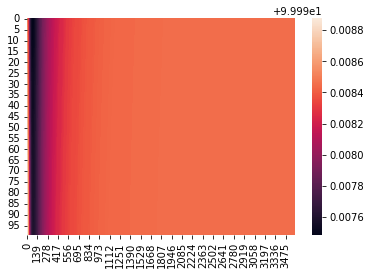

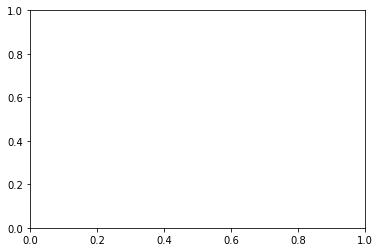

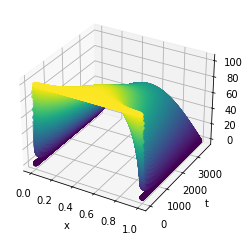

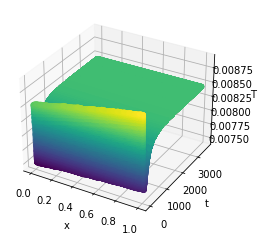

In [ ]:
#PLOT
y1=f(X_test)
x1=X_test[:,0]
t1=X_test[:,1]

arr_x1=x1.reshape(shape=[100,3600]).detach().cpu()
arr_T1=t1.reshape(shape=[100,3600]).detach().cpu()
arr_y1=y1.reshape(shape=[100,3600]).detach().cpu()
arr_y_test=T_real_torch.reshape(shape=[100,3600]).detach().cpu()


sns.heatmap(arr_y1.numpy())
plt.show()
fig.clf()

fig, ax1 = plt.subplots()
 #create 3D scatter plot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(arr_x1.numpy(),arr_T1.numpy(),arr_y_test.numpy(), c= arr_y_test.numpy())
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('T')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(arr_x1.numpy(),arr_T1.numpy(),arr_y1.numpy(), c=arr_y1.numpy())
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('T')
plt.show()



---



# **CONCLUSIONES**
La resolución analítica, las diferencias finitas y las redes neuronales de interpolación de física (PINN) son métodos numéricos utilizados para resolver problemas matemáticos y físicos. Cada uno de estos métodos tiene sus propias ventajas y desventajas, y la elección del método adecuado depende del tipo de problema que se esté abordando y de los recursos disponibles.

La resolución analítica es el método más preciso para resolver ecuaciones matemáticas y físicas, ya que proporciona una solución exacta, sin embargo, la resolución analítica solo es posible para un conjunto limitado de problemas y ecuaciones.

Las diferencias finitas, por otro lado, son métodos numéricos ampliamente utilizados para resolver ecuaciones diferenciales parciales. Las diferencias finitas son relativamente fáciles de implementar y son adecuadas para sistemas complejos, pero a menudo requieren una gran cantidad de cálculos y pueden ser computacionalmente costosos.

Las PINN son un enfoque relativamente nuevo, son extremadamente flexibles y pueden adaptarse a una amplia variedad de problemas, y se pueden implementar de manera muy eficiente en hardware moderno. Sin embargo, la precisión de la solución depende en gran medida de la calidad de los datos utilizados para entrenar la red.

Por un lado, las PINN tienen la capacidad de aproximar funciones complejas y pueden aprender la solución a partir de un conjunto relativamente pequeño de datos. Esto significa que pueden resolver problemas de EDP en sistemas con geometrías irregulares o en problemas en 3D, donde los métodos de diferencias finitas pueden ser ineficaces. Por otro lado, las PINN pueden ser computacionalmente costosas, especialmente para problemas en 3D o para grandes conjuntos de datos. Además, la precisión de la solución depende en gran medida de la calidad de los datos utilizados para entrenar la red y de la complejidad del modelo utilizado. En contraste, los métodos de diferencias finitas son más rápidos y menos costosos computacionalmente, pero pueden ser menos precisos en sistemas complejos.

En conclusión, la elección del método adecuado depende del tipo de problema que se esté abordando y de los recursos disponibles. La resolución analítica es el método más preciso pero solo se aplica a un conjunto limitado de problemas, mientras que las diferencias finitas y las PINN son métodos numéricos más generales y pueden adaptarse a una amplia variedad de problemas, y su eleccion dependera de las condiciones desde las cuales se pueda abordar el trabajo, ya bien de hardware como de calidad de los datos.



---



# **REFERENCIAS**

* Mitchell, T.M. (1997). Machine Learning. New York: McGraw-Hill.

* heat equation
http://dma.dima.uniroma1.it/users/lsa_adn/MATERIALE/FDheat.pdf


* https://arxiv.org/ftp/arxiv/papers/2010/2010.02011.pdf

* https://digitalcommons.csbsju.edu/cgi/viewcontent.cgi?article=1011&context=ur_thesis

* https://github.com/nanditadoloi/PINN

Otros
* http://d2l.ai/chapter_multilayer-perceptrons/mlp-implementation.html

* https://github.com/rtqichen/torchdiffeq




---

